# pooling simulation
## model assumptions
- basic idea is to pool samples, test a pool, and then divide the pool into smaller pools
- if a pool tests positive, it is kept in the queue and split into two smaller pools
- if a pool tests negative, it and all its constituents are removed from the testing queue
- if a pool is reduced to a single sample, it is a terminal test, its result is taken to be the patient result

- a false positive rate of 1.0 relative to f and false negative rate of 0.1 are assumed

- assumed perfect apriori knowledge of the average rate of positive tests
- used this number to compute the expected number of positive samples in the total sample population
- this is necessary to determine the initial pool size, each pool should have on average 1 positive sample
- thus a population rate of 0.5 positive or higher will likely be super-critical, leading to more tests with the pooling method than simply testing every sample individually, since tests will be wasted on pools with many positive samples in each fraction
- basic binary division followed for each splitting 

In [73]:
def split_pool(pool):
    pool_size = len(pool)
    split_1 = pool[0:int(pool_size/2)]
    split_2 = pool[int(pool_size/2):]
    print(len(split_1), len(split_2))
    return(split_1, split_2)

def run_test(samples, pool_dictionary):
    pool_result = 0
    false_positive = 0
    false_negative = 0
    for ID in samples:
        if pool_dictionary[ID] == 1:
            if random.random() < false_negative_rate:
                false_negative = 1
            else:
                pool_result = 1
        else:
            if random.random() < false_positive_rate:
                pool_result = 1 
                false_positive = 1
        if pool_result == 1 and false_negative == 1:
            false_negative = 0 #silent false negative since some other sample tested positive in the pool
    return pool_result, false_negative, false_positive

30.102999566398122  necessary binary divisions per positive case
split size 100
average multiplicity 1.0
initial queue size 1
50 50
25 25
12 13
6 6
3 3
1 2
1 1
total positive IDs:  2
true positives:  1
number of tests:  15
number of samples:  100
false positives:  0
false negatives:  0
30.102999566398122  necessary binary divisions per positive case
split size 100
average multiplicity 4.0
initial queue size 4
50 50
50 50
50 50
50 50
25 25
25 25
25 25
25 25
25 25
25 25
12 13
12 13
12 13
12 13
12 13
12 13
6 6
6 7
6 6
6 7
6 6
3 3
3 3
3 3
3 4
3 3
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 1
1 1
1 1
total positive IDs:  11
true positives:  6
number of tests:  80
number of samples:  400
false positives:  1
false negatives:  0
30.102999566398122  necessary binary divisions per positive case
split size 100
average multiplicity 9.0
initial queue size 9
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
12 13
12 13
12 13
12 

30.102999566398122  necessary binary divisions per positive case
split size 100
average multiplicity 81.0
initial queue size 81
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25

25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 2

3 4
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 4
3 3
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 3
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
2 2
1 2
2 2
2 2
2 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
2 2
1 2
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
total positive IDs:  190
true positives:  161
number of tests:  2088
number of samples:  16900
false positives:  16
false negatives:

6 6
6 7
6 6
6 7
6 7
6 7
6 6
6 7
6 6
6 6
6 6
6 7
6 7
6 7
6 6
6 7
6 7
6 6
6 7
6 6
6 7
6 6
6 7
6 7
6 7
6 6
6 7
6 6
6 7
6 6
6 6
6 7
6 7
6 6
6 6
6 7
6 7
6 6
6 6
6 7
6 7
6 6
6 6
6 7
6 7
6 6
6 7
6 7
6 7
6 7
6 6
6 7
6 7
6 7
6 6
6 7
6 6
6 6
6 7
6 6
6 6
6 6
6 7
6 7
6 6
6 6
6 7
6 6
6 7
6 7
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 3
3 4
3 3
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 4
3 3
3 3
3 3
3 3
3 4
3 4
3 4
3 4
3 3
3 4
3 3
3 4
3 4
3 4
3 4
3 4
3 3
3 3
3 4
3 3
3 4
3 4
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 4
3 3
3 3
3 3
3 3
3 4
3 4
3 4
3 3
3 4
3 3
3 3
3 4
3 3
3 3
3 3
3 3
3 4
3 4
3 4
3 3
3 3
3 3
3 3
3 4
3 3
3 4
3 3
3 3
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 3
3 4
3 4
3 3
3 3
3 3
3 3
3 3
3 4
3 4
3 3
3 3
3 3
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3


30.102999566398122  necessary binary divisions per positive case
split size 100
average multiplicity 289.0
initial queue size 289
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50


30.102999566398122  necessary binary divisions per positive case
split size 100
average multiplicity 324.0
initial queue size 324
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50


50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 2

3 3
3 3
3 4
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 3
3 3
3 4
3 4
3 4
3 3
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 3
3 4
3 4
3 3
3 3
3 3
3 3
3 3
3 4
3 3
3 4
3 3
3 3
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 4
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 4
3 4
3 3
3 3
3 3
3 3
3 4
3 4
3 3
3 4
3 3
3 4
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
2 2
1 2
1 2
2 2
2 2
1 2
1 2
1 2
2 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
2 2
2 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
2 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
2 2
2 2
1 2
1 2
1 2
1 2
1 2


1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 1
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 1


1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1


1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2


2 3
2 3
2 3
2 3
2 3
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 2
1 2
1 1


2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3


1 1
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2


2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3


2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3


1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1


5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5


2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3


1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5


2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2


1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1


5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5


5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5


2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3


2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 1
1 1


1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5


2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3


2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3
2 3


1 1
1 1
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 1
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2


1 2
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 2
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 2
1 2
1 1
1 1
1 1
1 2
1 2
1 2
1 1
1 1
1 2
1 2
1 1
1 1
1 2
1 2
1 2
1 1
1 2
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 1
1 2
1 2
1 1
1 2
1 1
1 2
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
total positive IDs:  27518
true positives:  11323
number of tests:  38120
number of samples:  22500
false positives:

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
total positive IDs:  31550
true positives:  12778
number of tests:  43551
number of samples:  25600
false positives:  2374
false negatives:  9596
4.0  necessary binary divisions per positive case
split size 2
average multiplicity 14450.0
initial queue size 14450
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


total positive IDs:  35390
true positives:  14344
number of tests:  49032
number of samples:  28900
false positives:  2666
false negatives:  10772
4.0  necessary binary divisions per positive case
split size 2
average multiplicity 16200.0
initial queue size 16200
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


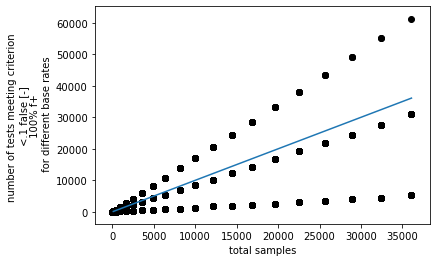

In [87]:
import numpy as np
import random
import matplotlib.pyplot as plt
import uuid
### initialize test pool ###

sizes = list(range(10,200,10))
false_negatives = np.zeros(len(sizes))
false_positives = np.zeros(len(sizes))
numbers_of_samples = np.zeros(len(sizes))
numbers_of_tests = np.zeros(len(sizes))
true_positive_rate = 0.01345

global false_negative_rate
false_negative_rate = 0.1

global false_positive_rate
# false_positive_rate = 0.01345

for true_positive_rate in [0.01, 0.1, 0.5]:
    for condition in range(0, len(sizes)):
        patient_samples = sizes[condition]**2
        
        false_positive_rate = true_positive_rate

        grand_test_pool = np.zeros((patient_samples))
        ids_grand_pool = np.zeros((patient_samples),uuid.UUID)
        pool_dictionary = {}


        true_positives = 0
        positive_patients= []
        # positive_patients = random.choices(range(0,patient_samples),k=int(true_positive_rate*patient_samples))
        for i in range(0,patient_samples):
            ID = uuid.uuid4()
            ids_grand_pool[i] = ID
            if random.random() <= true_positive_rate:
                true_positives += 1
                grand_test_pool[i] = 1
                pool_dictionary[ID] =1
                positive_patients.append(i)
            else:
                pool_dictionary[ID] =0

        #initial split
        guess_rate = true_positive_rate
        guess_average_multiplicity = patient_samples*guess_rate
        shannon_information = guess_rate * np.log2(guess_rate) 
        print(-2/shannon_information, " necessary binary divisions per positive case")


        main_queue = []
        split_size = int(1/guess_rate)
        for multiple in range(0, int(guess_average_multiplicity)):
            main_queue.append(ids_grand_pool[split_size*multiple:split_size*multiple+split_size])

        print("split size", split_size)
        print("average multiplicity", guess_average_multiplicity)
        print("initial queue size", len(main_queue))


        total_false_negatives, total_false_positives = 0,0
        MASTER_TEST_COUNTER = 0
        POSITIVE_IDS = 0
        while len(main_queue) > 0:

            if len(main_queue[0]) > 1:
                pool_a, pool_b = split_pool(main_queue[0])    


                MASTER_TEST_COUNTER += 1
                main_queue.remove(main_queue[0])
                A, afalse_positive, afalse_negative = run_test(pool_a, pool_dictionary)
                if A == 1:
                    main_queue.append(pool_a)
                    if len(pool_a) == 1:
                        POSITIVE_IDS += 1
                        total_false_negatives += afalse_negative
                        total_false_positives += afalse_positive
                else:
                    if len(pool_a) == 1:
                        total_false_negatives += afalse_negative
                        total_false_positives += afalse_positive


                MASTER_TEST_COUNTER += 1
                B, bfalse_positive, bfalse_negative = run_test(pool_b, pool_dictionary)
                if B == 1:
                    main_queue.append(pool_b)
                    if len(pool_b) == 1:
                        POSITIVE_IDS += 1
                        total_false_negatives += bfalse_negative
                        total_false_positives += bfalse_positive
                else:
                    if len(pool_b) == 1:
                        total_false_negatives += bfalse_negative
                        total_false_positives += bfalse_positive

            
            else:
                MASTER_TEST_COUNTER += 1
                C, cfalse_positive, cfalse_negative = run_test(main_queue[0], pool_dictionary)
                total_false_negatives += cfalse_negative
                total_false_positives += cfalse_positive
                if C == 1:
                    POSITIVE_IDS += 1
    #                 print("+")
                main_queue.remove(main_queue[0])
        print("total positive IDs: ", POSITIVE_IDS)        
        print("true positives: ", true_positives)
        print("number of tests: ", MASTER_TEST_COUNTER)
        print("number of samples: ", patient_samples)
        print("false positives: ", total_false_positives)
        print("false negatives: ", total_false_negatives)

        false_negatives[condition] = total_false_negatives
        false_positives[condition] = total_false_positives
        numbers_of_samples[condition] = patient_samples
        numbers_of_tests[condition] = MASTER_TEST_COUNTER
        plt.scatter(numbers_of_samples, numbers_of_tests, c="k")
plt.plot(numbers_of_samples,numbers_of_samples)        
plt.xlabel("total samples")
plt.ylabel("number of tests meeting criterion \n <.1 false [-] \n 100% f+ \n for different base rates" )
plt.show()
plt.close()